In [1]:
import pickle
import matplotlib.pyplot as plt

from utils import load_tuning_results
from post_processing import best_PCA, get_training_times, get_rand_scores
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA

Loading the results of the tuning phase.

In [2]:
gaussian_mixture = load_tuning_results("GaussianMixture")
gaussian_mixture

{2: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.839151149439951,
  4.052321195602417),
 12: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8401750184982012,
  3.839906930923462),
 22: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8372634398999821,
  6.547507047653198),
 32: (GaussianMixture(covariance_type='diag', init_params='random_from_data',
                  max_iter=200, n_components=15, random_state=1),
  {'init_params': 'random_from_data', 'n_components': 15},
  0.8313019671880182,
  8.185797929763794),
 42: (GaussianMixture(covariance_type='diag', init_params='random_from_data',
                  max_iter=200, n_components=15, random_state=

Now we search for the PCA dimension corresponding to the best rand score.

Recall: gaussian_mixture is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (best estimator, Dict['init_params' : value, 'n_components' : value], rand score, training time).

In [3]:
best_PCA(gaussian_mixture)

The best PCA dimension is 12, with hyperparameters =  {'init_params': 'kmeans', 'n_components': 15}


In [4]:
rand_scores = get_rand_scores(gaussian_mixture)
rand_scores

[0.839151149439951,
 0.8401750184982012,
 0.8372634398999821,
 0.8313019671880182,
 0.8225896333528946,
 0.821923940499579,
 0.8211595055239457,
 0.8186597606715484,
 0.8068532008266782,
 0.8085022325415252,
 0.8081514556170746,
 0.8003608169826244,
 0.8068732809430255,
 0.7912740157681218,
 0.7949284055826296,
 0.7993541959023295,
 0.8010048733192152,
 0.7970057025489246,
 0.8038394356135024,
 0.7968267547776388,
 0.8271212461408926]

In [5]:
training_times = get_training_times(gaussian_mixture)
training_times

[4.052321195602417,
 3.839906930923462,
 6.547507047653198,
 8.185797929763794,
 11.584955930709839,
 12.121771097183228,
 13.517406940460205,
 13.695307970046997,
 15.15396785736084,
 17.159058809280396,
 18.614891052246094,
 20.238881826400757,
 28.051939725875854,
 25.486502170562744,
 27.358335971832275,
 32.91746211051941,
 35.071181774139404,
 34.97044110298157,
 39.93830108642578,
 43.411508083343506,
 40.465912103652954]

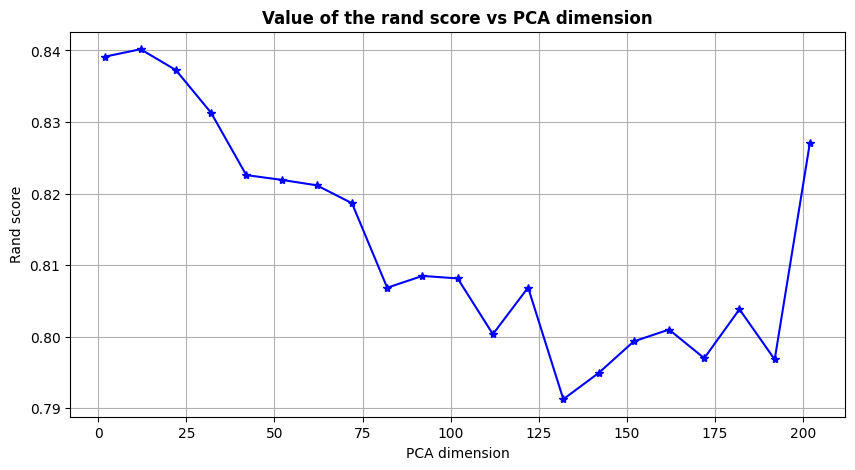

In [6]:
pca_dimensions = range(2,200+10,10)

plot_rand_score_vs_PCA(pca_dimensions, rand_scores)

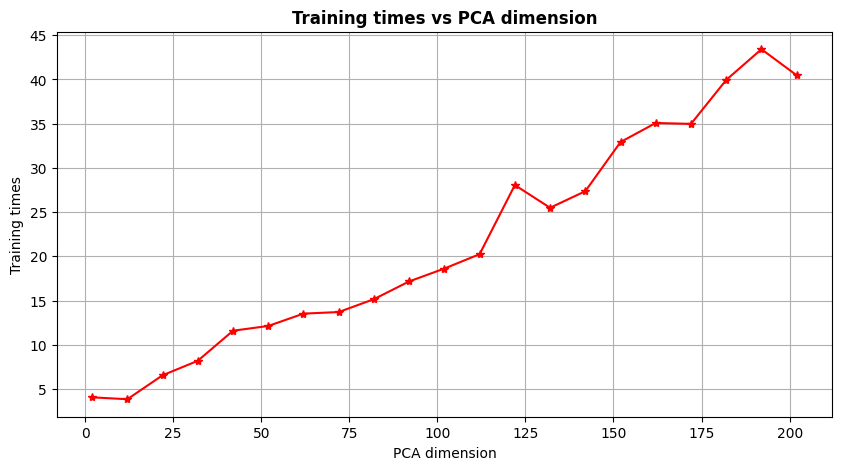

In [7]:
plot_training_time_vs_PCA(pca_dimensions, training_times)

## TODO
- plot dei clusters;
- predict usando best_estimator.